# Film production.

# 1.0 Introduction

## 1.0.1 Business Understanding

One of the most well-known forms of art is film production, which has millions of spectators worldwide. There are many ways that movies can be communicated to viewers as a result of the development of various films genres over time.

I intend to analyse on the categories of movies that are doing the best at the box office and to translate findings into useful advice for my client and the factors to consider for a movie producer to ensure maximum return on investment.

## 1.0.2 Data Understanding

The dataset for this project was compiled from several sources.The data have been collected over the past years and its from box office and the IMDB database.
These are the sites with accurate movie data and are frequently updated hence the choice for these sites.
These are the datasets I will use for my analysis. 
* Box Office Mojo data
* IMDB  data  
* popular movies data
* top rated movies data

The finals datasets I used for my analysis had 1517 rows, and 9 columns.These were the features for my analysis:
 * release_date 
 * original_title'
 * production_budget
 * domestic_gross
 * worldwide_gross
 * averagerating
 * genres
 * numvotes
 * runtime_minutes
 * studio

Release_date I used to check on how the genres have been changing over the years as well as how the profits have been chaging over time.

Original title was the unique identifier for all the movies in my dataset.I used this to merge most of the datasets and to check for duplicates.

Production budget was crucial for my analysis,I used it for cmparison of how budgets for genres differed at to clasify the top 100 most expensive movies, and to find the correlation between domestic gross.

To analyse profit making movies I used the domestic gross to classify movies as either profit making or loss.

The average rating was to classify movies based on their popularity and how they are rated.

Genres column was to check how gross changes per movie genre

Runtime in minutes was to analyse how movie duration has been changing over time and classify movies.

studio feature was to compare and how it relates to the the worlwide gross.

# 2.0 Data Preparation Process

The data has to be prepared before the anlysys begins.

## 2.0.1 Loading Libraries
All important libraries that I used in my anlysis and connecting to the sqllite database to access the im dataset 

In [32]:
# Importing libraries
import pandas as pd
import numpy as np

import sqlite3
from dateutil import parser
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.cm as cm


# Read sqlite query results into a pandas DataFrame
conn = sqlite3.Connection("Data/im.db")

## 2.0.2 Loading datasets

In [10]:
# Loading of the data sets.
  
#box office gross dataset
box_office_df = pd.read_csv('Data/bom.movie_gross.csv.gz')

#Teddy Newton movie budgets dataset
movie_budgets_df = pd.read_csv('Data/tn.movie_budgets.csv.gz')

#the movie data base dataset
tmdb_df = pd.read_csv('Data/tmdb.movies.csv.gz')

#Rotten Tomatoes reviews dataset
rt_reviews_df = pd.read_csv('Data/rt.reviews.tsv.gz', sep='\t', encoding = 'unicode_escape')

#Rotten Tomatoes movie info dataset
rt_movie_info_df = pd.read_csv('Data/rt.movie_info.tsv.gz', sep='\t', encoding = 'unicode_escape')


In [11]:
 #Read sqlite query results into a pandas DataFrame
#joining the two tables using the movie_id key

joint_query = """
SELECT *
FROM movie_basics
JOIN movie_ratings USING (movie_id)
;
"""
joint_query = pd.read_sql(joint_query, conn)
joint_query.tail(3)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5
73855,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,6.5,11


# 3.0 Data Cleaning

### 3.0.1 combining of the data sets to a final data set

In [4]:
#the data sets were all combied on common keys before cleaning of the data

joint_query.dropna(inplace = True)

box_office_df.dropna(inplace = True)

box_office_df.rename(columns = {'title':'original_title'}, inplace = True)

combined_data_1 = pd.merge(joint_query, box_office_df, how='inner', on='original_title')

movie_budgets_df.dropna(inplace = True)

movie_budgets_df.rename(columns = {'movie':'original_title'}, inplace = True)
 
# Find the columns that aren't in the first DataFrame
different_cols = combined_data_1.columns.difference(movie_budgets_df.columns)
 
# Filter out the columns that are different.
data3 = combined_data_1[different_cols]
 
# Merge the DataFrames
data = pd.merge(movie_budgets_df, data3, left_index=True,
                     right_index=True, how='inner')
data.shape

(1517, 16)

In [16]:
# dropping of data features that I did not want to analyse.
final_data = data.drop(['id','foreign_gross','movie_id','primary_title','start_year','year'], axis=1)

### 3.1 cleaning of the final dataset

#### 3.1.0 fixing structural issues
removal of the **$** from production_budget, domestic_gross and worldwide_gross


In [109]:
final_data['production_budget'] = final_data['production_budget'].str.replace('[\$\,]','',regex=True)
final_data['domestic_gross'] = final_data['domestic_gross'].str.replace('[\$\,]','',regex=True)
final_data['worldwide_gross'] = final_data['worldwide_gross'].str.replace('[\$\,]','',regex=True)


#### 3.1.1 changing data types 
production_budget, domestic_gross and worldwide_gross

In [110]:
final_data['production_budget'] = pd.to_numeric(final_data['production_budget']) 
final_data['domestic_gross'] = pd.to_numeric(final_data['domestic_gross'])
final_data['worldwide_gross'] = pd.to_numeric(final_data['worldwide_gross'])

final_data.dtypes

release_date          object
original_title        object
production_budget      int64
domestic_gross         int64
worldwide_gross        int64
averagerating        float64
genres                object
numvotes               int64
runtime_minutes      float64
studio                object
dtype: object

In [8]:
list(final_data.columns)

['release_date',
 'original_title',
 'production_budget',
 'domestic_gross',
 'worldwide_gross',
 'averagerating',
 'genres',
 'numvotes',
 'runtime_minutes',
 'studio']

### data after cleaning

In [9]:
final_data.shape

(1517, 10)

In [10]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       1517 non-null   object 
 1   original_title     1517 non-null   object 
 2   production_budget  1517 non-null   int64  
 3   domestic_gross     1517 non-null   int64  
 4   worldwide_gross    1517 non-null   int64  
 5   averagerating      1517 non-null   float64
 6   genres             1517 non-null   object 
 7   numvotes           1517 non-null   int64  
 8   runtime_minutes    1517 non-null   float64
 9   studio             1517 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 130.4+ KB


## 4.0 Exploratory Data Analysis

### 4.0.1 Profit Calculation

I now want to discuss the relationship between a movie's budget and how much it earns at the box office. I'll focus on the **Domestic gross**, which includes all ticket sales revenue from US and Canadian theaters.

I'll use the Pearson correlation coefficient to measure the linear correlation   between the production  budget and box office domestic gross.


This result indicates a correlation of **0.6** between production budget and the domestic gross.
This implies a **moderate** strength of relationship.

,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,runtime_minutes,domestic_profit
production_budget,1.000000,0.597889,0.680573,-0.003916,0.150140,-0.001864,0.114098
domestic_gross,0.597889,1.000000,0.933668,-0.018694,0.084532,0.000663,0.864562
worldwide_gross,0.680573,0.933668,1.000000,-0.003446,0.096666,-0.000801,0.730514
averagerating,-0.003916,-0.018694,-0.003446,1.000000,0.413918,0.247586,-0.020714
numvotes,0.150140,0.084532,0.096666,0.413918,1.000000,0.368927,0.010642
runtime_minutes,-0.001864,0.000663,-0.000801,0.247586,0.368927,1.000000,0.001990
domestic_profit,0.114098,0.864562,0.730514,-0.020714,0.010642,0.001990,1.000000


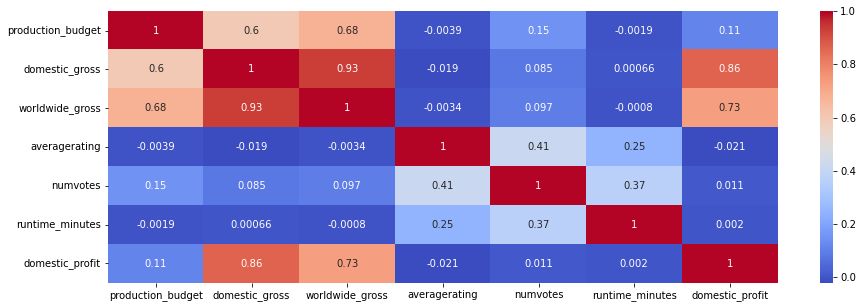

In [11]:
final_data['domestic_profit'] = final_data['domestic_gross'] - final_data['production_budget']
correlation_df = final_data.iloc[:, [6,2,3,4,10]].head(13)
correlation = final_data.corr()
plt.figure(figsize=(15,5))
sns.heatmap(correlation, xticklabels = correlation.columns,
            yticklabels = correlation.columns,
            cmap = 'coolwarm', annot = True);
correlation

###  4.0.2 Genre Analysis

#### How are genres changing over time?

I've analyzed genre ties in this section. Because most of the movies in my datasets fit into more than one genre,it would be interesting to learn how the different types are related and perhaps check on how they affect the popularity of the movies compared against number votes.


In [12]:
final_data.sort_values(by='release_date', ascending=True)

,release_date,original_title,production_budget,domestic_gross,worldwide_gross,averagerating,genres,numvotes,runtime_minutes,studio,domestic_profit
1408,"Apr 1, 2005",Sin City,40000000,74103820,158527918,7.1,"Action,Adventure,Comedy",244024,118.0,BV,34103820
271,"Apr 1, 2010",Clash of the Titans,125000000,163214888,493214888,5.5,"Adventure,Comedy,Fantasy",92940,102.0,Uni.,38214888
826,"Apr 1, 2011",Hop,63000000,108085305,188657593,7.0,Drama,10,105.0,Par.,45085305
1003,"Apr 10, 1998",City of Angels,55000000,78750909,198750909,6.4,"Action,Adventure,Drama",57033,112.0,Fox,23750909
1274,"Apr 11, 1997",Anaconda,45000000,65598907,136998907,7.6,"Drama,History,Thriller",263004,142.0,BV,20598907
...,...,...,...,...,...,...,...,...,...,...,...
1491,"Sep 6, 2002",City by the Sea,40000000,22433915,22433915,5.4,"Comedy,Romance",39936,110.0,STX,-17566085
1482,"Sep 7, 2001",The Musketeer,40000000,27053815,27053815,4.9,"Action,Crime,Drama",6805,89.0,SGem,-12946185
1224,"Sep 7, 2007",3:10 to Yuma,48000000,53606916,71171825,3.5,Horror,303,94.0,Uni.,5606916
870,"Sep 9, 2011",Contagion,60000000,75658097,137551594,5.5,"Action,Adventure,Drama",100467,105.0,TriS,15658097


In [13]:
genre_frequncy = dict(final_data['genres'].str.split(',', expand=True).stack().value_counts())
genre_frequncy

{'Drama': 766,
 'Comedy': 525,
 'Action': 396,
 'Adventure': 330,
 'Thriller': 261,
 'Crime': 223,
 'Romance': 211,
 'Biography': 148,
 'Horror': 147,
 'Mystery': 124,
 'Sci-Fi': 109,
 'Fantasy': 108,
 'Animation': 98,
 'Family': 81,
 'Documentary': 78,
 'History': 60,
 'Music': 44,
 'Sport': 35,
 'War': 14,
 'Musical': 9,
 'Western': 9,
 'News': 1}

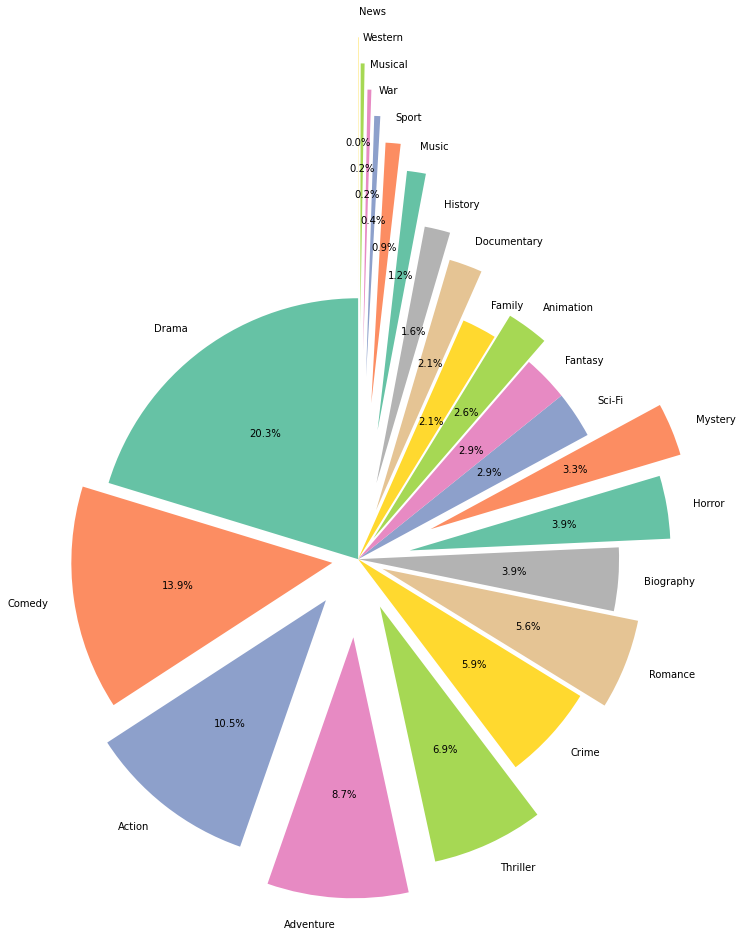

In [14]:
fig, ax = plt.subplots(figsize =(15, 12))
explode = (0.0, 0.1, 0.2, 0.3, 0.2, 0.0,0.1,
           0.0, 0.2, 0.3, 0.0, 0.0,0.1, 0.0,
           0.2, 0.3, 0.5, 0.6,0.7, 0.8, 0.9, 1.0)

plt.pie(genre_frequncy.values(), labels=genre_frequncy.keys(),
        startangle=90, autopct='%.1f%%', colors=plt.cm.Set2.colors,
        explode = explode)

plt.show();

Drama movies had the highest frequency counts and it was the most distributed genre across the combinations.

#### Which genres have the highest correlation between budget and market success?

To find the most expensive movies based on production budget, I sort my production budget in descending order and checked for the top 100.

I am grouping my data by production budget to find out the top 100 expensive movies from my dataset then look into their genres to find out which genre appears most in the expensive movies.

In [98]:
top_expensive_genre = final_data.sort_values(by=['production_budget'], ascending=False,).head(100)
print('These are the top 10 most expensive movies from my dataset')
top_expensive_genre.iloc[:,[6,1,2,3,4]].head(15)

These are the top 10 most expensive movies from my dataset


,genres,original_title,production_budget,domestic_gross,worldwide_gross
407,"Horror,Thriller",The LEGO Movie 2: The Second Part,"$99,000,000","$105,806,508","$190,325,698"
408,"Adventure,Drama,Western",Robin Hood,"$99,000,000","$30,824,628","$84,747,441"
406,"Comedy,Drama,Romance",The Peanuts Movie,"$99,000,000","$130,178,411","$250,091,610"
409,"Drama,Romance",The Mummy Returns,"$98,000,000","$202,007,640","$435,040,395"
410,Comedy,Gangs of New York,"$97,000,000","$77,730,500","$183,124,621"
411,"Comedy,Drama,Romance",Alien: Covenant,"$97,000,000","$74,262,031","$238,521,247"
418,Action,Unstoppable,"$95,000,000","$81,562,942","$165,720,921"
423,"Comedy,Drama,Romance",Seventh Son,"$95,000,000","$17,725,785","$108,874,967"
422,"Adventure,Animation,Comedy",Ben-Hur,"$95,000,000","$26,410,477","$91,669,648"
421,"Comedy,Mystery",The Lovely Bones,"$95,000,000","$44,114,232","$94,894,448"


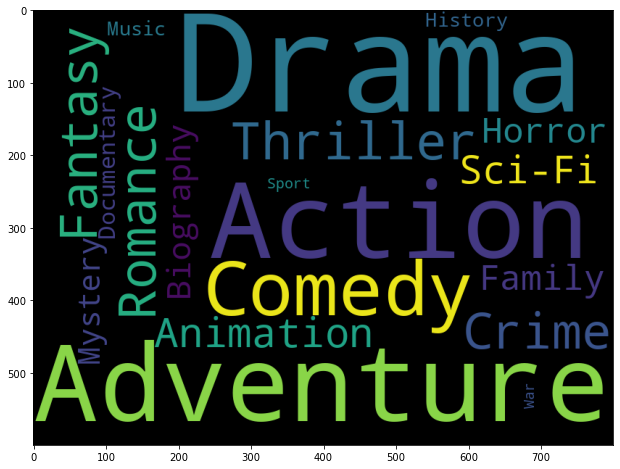

In [16]:
genres_in_top_expensive_movies = dict(top_expensive_genre['genres'].str.split(',', expand=True).stack().value_counts())

wordcloud = WordCloud(width = 800, height = 600,
                     collocations = False, 
                      ).generate_from_frequencies(genres_in_top_expensive_movies)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud);

This indicates, top perfoming genres are also the top expensive movies to produce.This means that in  majority of the cases, a larger budget has also resulted in a higher domestic box office gross.

Since most of the movies in the dataset have multiple Genres, I decided to split each of them to have a count plot and see how they are distributed.
From the value counts of the genres, drama had the highest value count while news had the least count.

#### average cost of producing movies

The average cost of producing a movie is 84832737 in USD


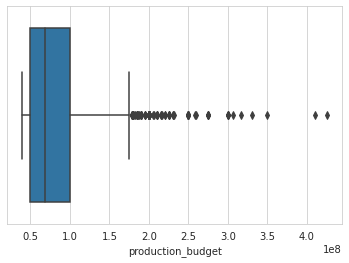

In [148]:
production_cost = final_data.iloc[:,[6,1,2,3,4]]
print(f"The average cost of producing a movie is {round(production_cost.production_budget.mean())} in USD")

sns.set_style("whitegrid")
sns.boxplot(x = 'production_budget', data = production_cost);


The average cost of producing a movie is 84832737 in USD
The average domestic gross 99004374 in USD
The average worldwide gross 242858819 in USD


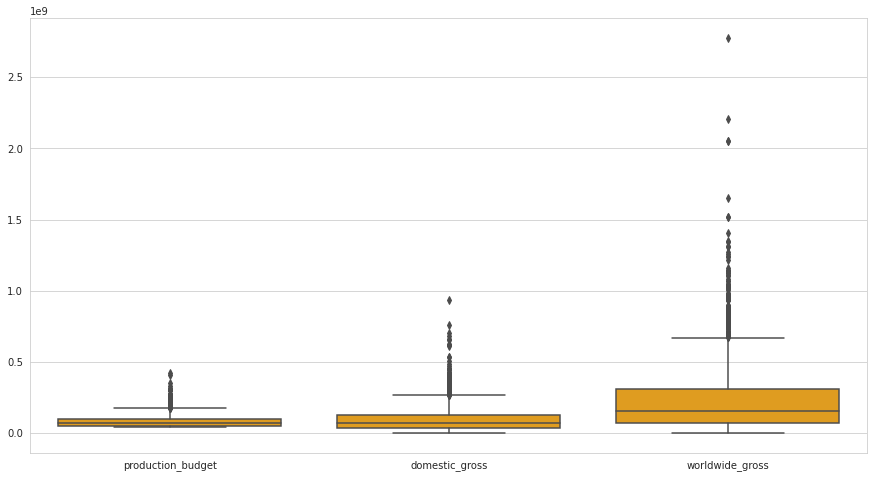

In [160]:
print(f"The average cost of producing a movie is {round(production_cost.production_budget.mean())} in USD")
print(f"The average domestic gross {round(production_cost.domestic_gross.mean())} in USD")
print(f"The average worldwide gross {round(production_cost.worldwide_gross.mean())} in USD")

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=production_cost, color='orange', dodge=False);


### 4.0.3 Runtime Analysis.

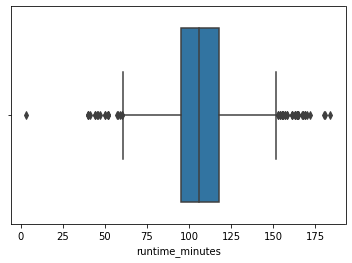

In [17]:
sns.boxplot(x=final_data["runtime_minutes"]);

In [18]:
final_data['runtime_minutes'].mean()

107.62491760052735

The average runtime of most movies was at 100 minutes.I decided to check how it has changed over the years.

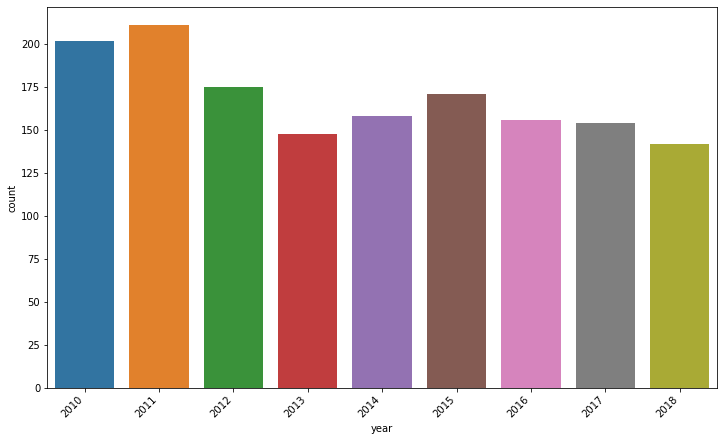

In [52]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.countplot(data=data['runtime_minutes'], x=data['year'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Its is clear, the runtime for movies has not changed over the yaers, much.Its still 

### 4.0.4 Top movie stuido based on worlwide gross

In [211]:
print(f"These are the top 15 movie studios from my dataset{pd.DataFrame(final_data.studio.value_counts()).head(15)}")

These are the top 15 movie studios from my dataset         studio
Uni.        147
Fox         130
WB          111
BV           86
Par.         82
Sony         76
LGF          75
Wein.        58
FoxS         50
Focus        45
WB (NL)      45
IFC          35
RAtt.        34
SPC          33
LG/S         31


## 5.0 Conclusion

* Drama, Comedy and Action are the top genres. As seen in the pie chart and wordcloud
* Production budget and domestic gross have a high correlation.
* Drama genre continues to dominate most of the movies being produced.
* Runtime of movies has not greatly changed over the yaers as seen from the analysis.
* Significant number of movies go into loss.
* Movies that audience easily relates with are popular and have higher ratings.


## 6.0 Recommendations

* To enter into the film industry, it is important to consider short movies at an average of 50 minutes.

* There are factors that affect the movie perfomance after it has been prodced these include release date and the streaming platforms.

* More research could be done to understand what causes movies to be non profitable. This could help avoid loss in the movie industry.